In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [40]:
data = pd.read_csv('/content/tweets.csv')

In [41]:
pd.set_option('display.max_colwidth',None)
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [42]:
data['tweet'].unique()

array(['#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone',
       'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/',
       'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu',
       ...,
       "Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!",
       'Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/',
       'Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/'],
      dtype=object)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


<Axes: xlabel='label', ylabel='count'>

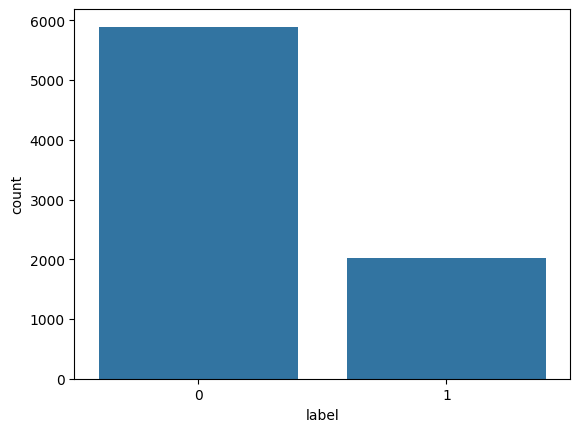

In [44]:
import seaborn as sns
sns.countplot(x='label', data=data)

In [45]:
data['label'].unique()

array([0, 1])

In [46]:
#seperating Positive and negative
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]


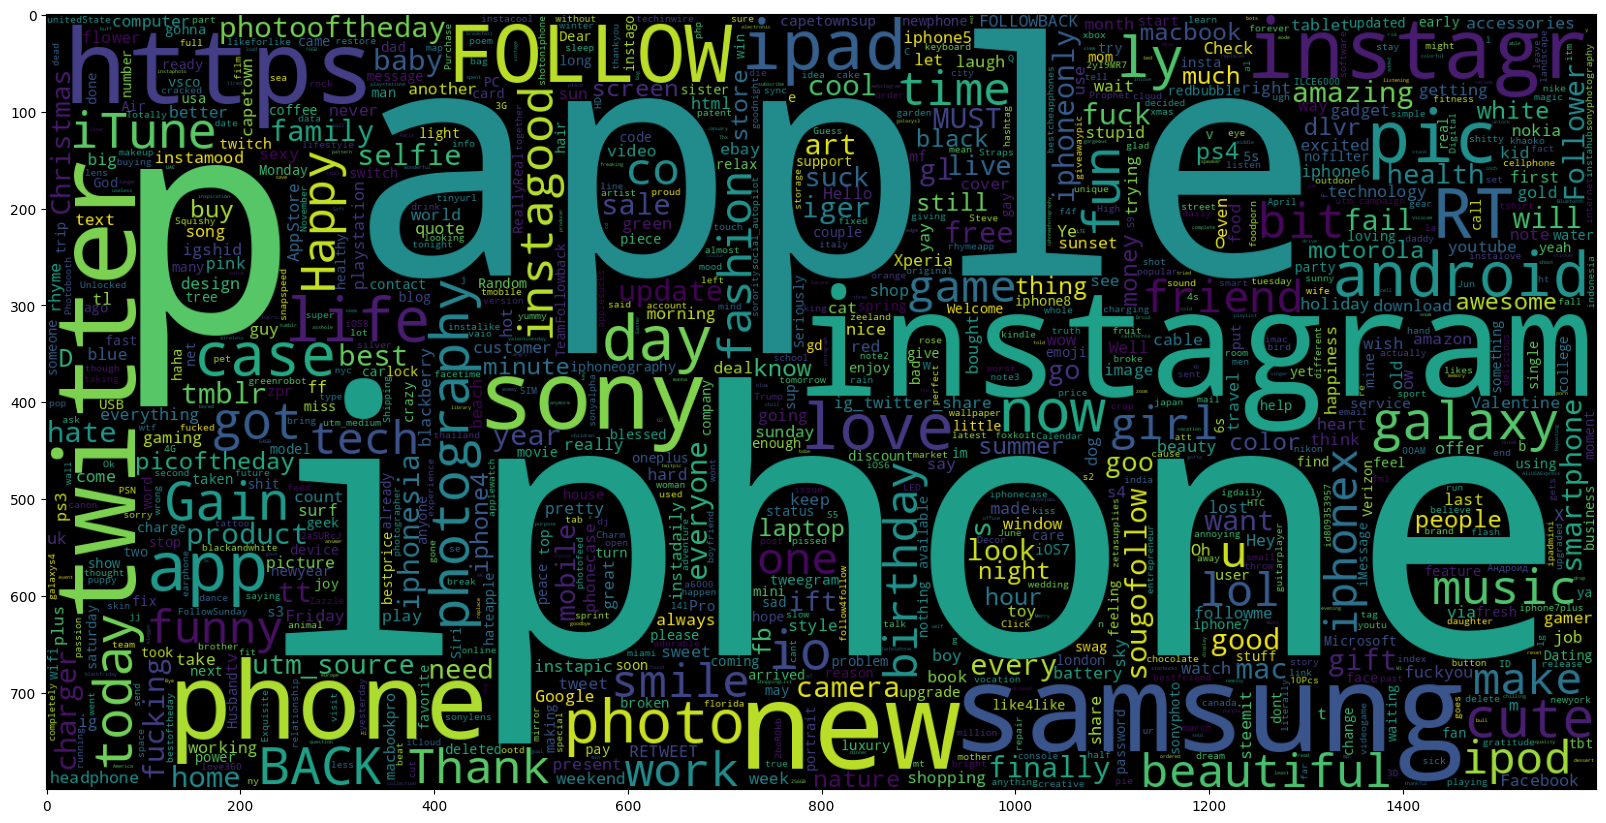

In [47]:
#word cloud
data_1= data['tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_1))
plt.imshow(wc)

In [48]:
import gensim
data['tweet'] = data['tweet'].apply(lambda x:gensim.utils.simple_preprocess(x))

In [49]:
np.sum(data.isnull().any(axis=1))

0

In [50]:
data.head()

,id,label,tweet
0,1,0,"[fingerprint, pregnancy, test, https, goo, gl, mfqv, android, apps, beautiful, cute, health, igers, iphoneonly, iphonesia, iphone]"
1,2,0,"[finally, transparant, silicon, case, thanks, to, my, uncle, yay, sony, xperia, sonyexperias, http, instagram, com, yget, jc, jm]"
2,3,0,"[we, love, this, would, you, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, connect, http, fb, me, lsupcu]"
3,4,0,"[wired, know, george, was, made, that, way, iphone, cute, daventry, home, http, instagr, am, li_]"
4,5,1,"[what, amazing, service, apple, won, even, talk, to, me, about, question, have, unless, pay, them, for, their, stupid, support]"


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['tweet'],data['label'],test_size =0.3)

In [52]:
from gensim.models import Word2Vec
w2v_model = gensim.models.Word2Vec(x_train,min_count = 1)

In [53]:
len(w2v_model.wv['with'])

100

In [54]:
w2v_model.wv.most_similar('with')

[('than', 0.9996045827865601),
 ('ever', 0.9995549917221069),
 ('more', 0.9995203018188477),
 ('year', 0.9994876980781555),
 ('screen', 0.9994727969169617),
 ('doesn', 0.9994375705718994),
 ('its', 0.9994342923164368),
 ('ll', 0.999428391456604),
 ('laptop', 0.9994195103645325),
 ('there', 0.9994168877601624)]

In [55]:
words = w2v_model.wv.index_to_key

In [56]:
len(words)

17221

In [57]:
x_train_vec = []
x_test_vec = []

for ls in x_train:
  vec = []
  for word in ls:
    if word in words:
      vec.append(w2v_model.wv['word'])
  x_train_vec.append(np.array(vec))

In [58]:
for ls in x_test:
  vec = []
  for word in ls:
    if word in words:
      vec.append(w2v_model.wv['word'])
  x_test_vec.append(np.array(vec))


In [59]:
x_train_vec_avg = []
x_test_vec_avg = []

def cal_avg_vec(v):
  if v.size:
    return v.mean(axis = 0)
  else:
    np.zeros(100,dtype=float)

for v in x_train_vec:
  x_train_vec_avg.append(cal_avg_vec(v))

for v in x_test_vec:
  x_test_vec_avg.append(cal_avg_vec(v))

In [60]:
x_train_vec_avg = np.array(x_train_vec_avg)
x_test_vec_avg = np.array(x_test_vec_avg)

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train_vec_avg,y_train)

RandomForestClassifier()

In [62]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test_vec_avg)

In [63]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
accuracy_score(y_test,y_pred)

0.7487373737373737

In [65]:
tweet = "@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , Im fine thanks , hows you ?"

In [66]:
tweet = gensim.utils.simple_preprocess(tweet)

In [67]:
vec_review = np.array([w2v_model.wv[i] for i in tweet if i in words]).mean(axis = 0)

In [68]:
y_pred = clf.predict([vec_review])

In [69]:
y_pred

array([0])

In [70]:
import gensim.downloader

In [71]:
glove_vect = gensim.downloader.load('glove-twitter-100')

In [72]:
glove_vect.most_similar('instagram')

[('insta', 0.8666549324989319),
 ('tumblr', 0.8512125015258789),
 ('facebook', 0.8401461243629456),
 ('twitter', 0.8349380493164062),
 ('ig', 0.8342240452766418),
 ('fb', 0.7595731019973755),
 ('snapchat', 0.7172855734825134),
 ('pics', 0.7021591663360596),
 ('timeline', 0.6992321610450745),
 ('tweets', 0.6967366933822632)]

In [75]:
glove_vect.most_similar('twitter')

[('facebook', 0.9003353714942932),
 ('fb', 0.8688419461250305),
 ('instagram', 0.8349379897117615),
 ('tweet', 0.8055214285850525),
 ('tweets', 0.7990750670433044),
 ('tumblr', 0.7980496287345886),
 ('tl', 0.7965695261955261),
 ('timeline', 0.7899292707443237),
 ('internet', 0.7715756893157959),
 ('twiter', 0.7672109007835388)]